In [1]:
import matplotlib.pyplot as plt
import numpy as np

from astropy.io import fits
from astropy.stats import mad_std
from astropy.visualization import ZScaleInterval, imshow_norm, ImageNormalize

import os

##

object = input('Carpeta con los cubos a colapsar: ') #'M34_0001'

path = os.getcwd()
path = os.path.dirname(path)+f'/output/{object}/'

In [3]:
name = input('Nombre para el archivo fits del cubo colapsado: ') # cube_original

total_files = [file for file in os.listdir(path) if file.startswith(f'{object}_slice')]
for i in range(len(total_files)): 
    with fits.open(path+f'{object}_slice_{i+1}.fits') as hdul:
        img = hdul[0].data
        header = hdul[0].header
        
        if i == 0:
            suma = img  
        else:
            suma += img  

img_sum = fits.PrimaryHDU(suma, header=header)
hdul = fits.HDUList([img_sum] )
hdul.writeto(path+f'{name}.fits', overwrite=True)


Nombre para el archivo fits del cubo colapsado: cubo_original


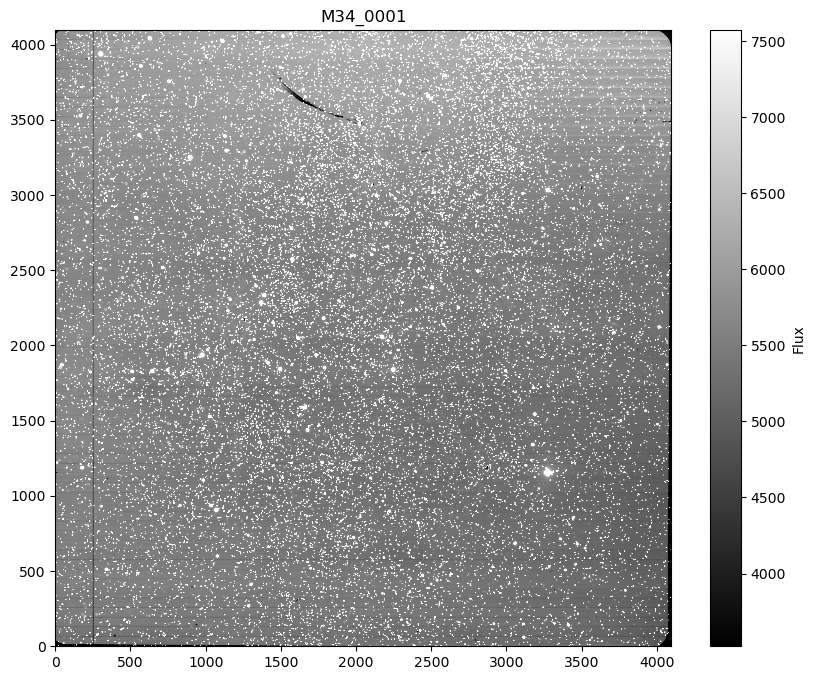

In [4]:

# norm func
def normalization(img):
    intervalo = ZScaleInterval()
    vmin, vmax = intervalo.get_limits(img)
    norm = ImageNormalize(vmin=vmin, vmax=vmax)
    return norm

cube = fits.getdata(path+f'{name}.fits')

plt.figure(figsize=(10, 8))
plt.imshow(cube , cmap='gray', origin='lower',norm=normalization(cube))
plt.title(f'{object}')
plt.colorbar(label='Flux')
plt.show()
